In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [3]:
# (do not change this code)
words = open('names.txt').read().splitlines()

In [4]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [5]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()}

In [6]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [7]:
N = torch.zeros((27,27))
for w in words:
    w = '.' + w + '.'
    k = len(w)
    for i in range(k-1):
        j = i+1
        c1 = w[i]
        c2 = w[j]
        i1 = stoi[c1]
        i2 = stoi[c2]
        N[i1][i2] += 1

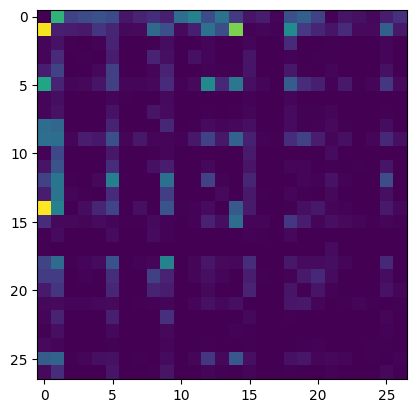

In [8]:
# display the matrix
plt.imshow(N)
plt.show()

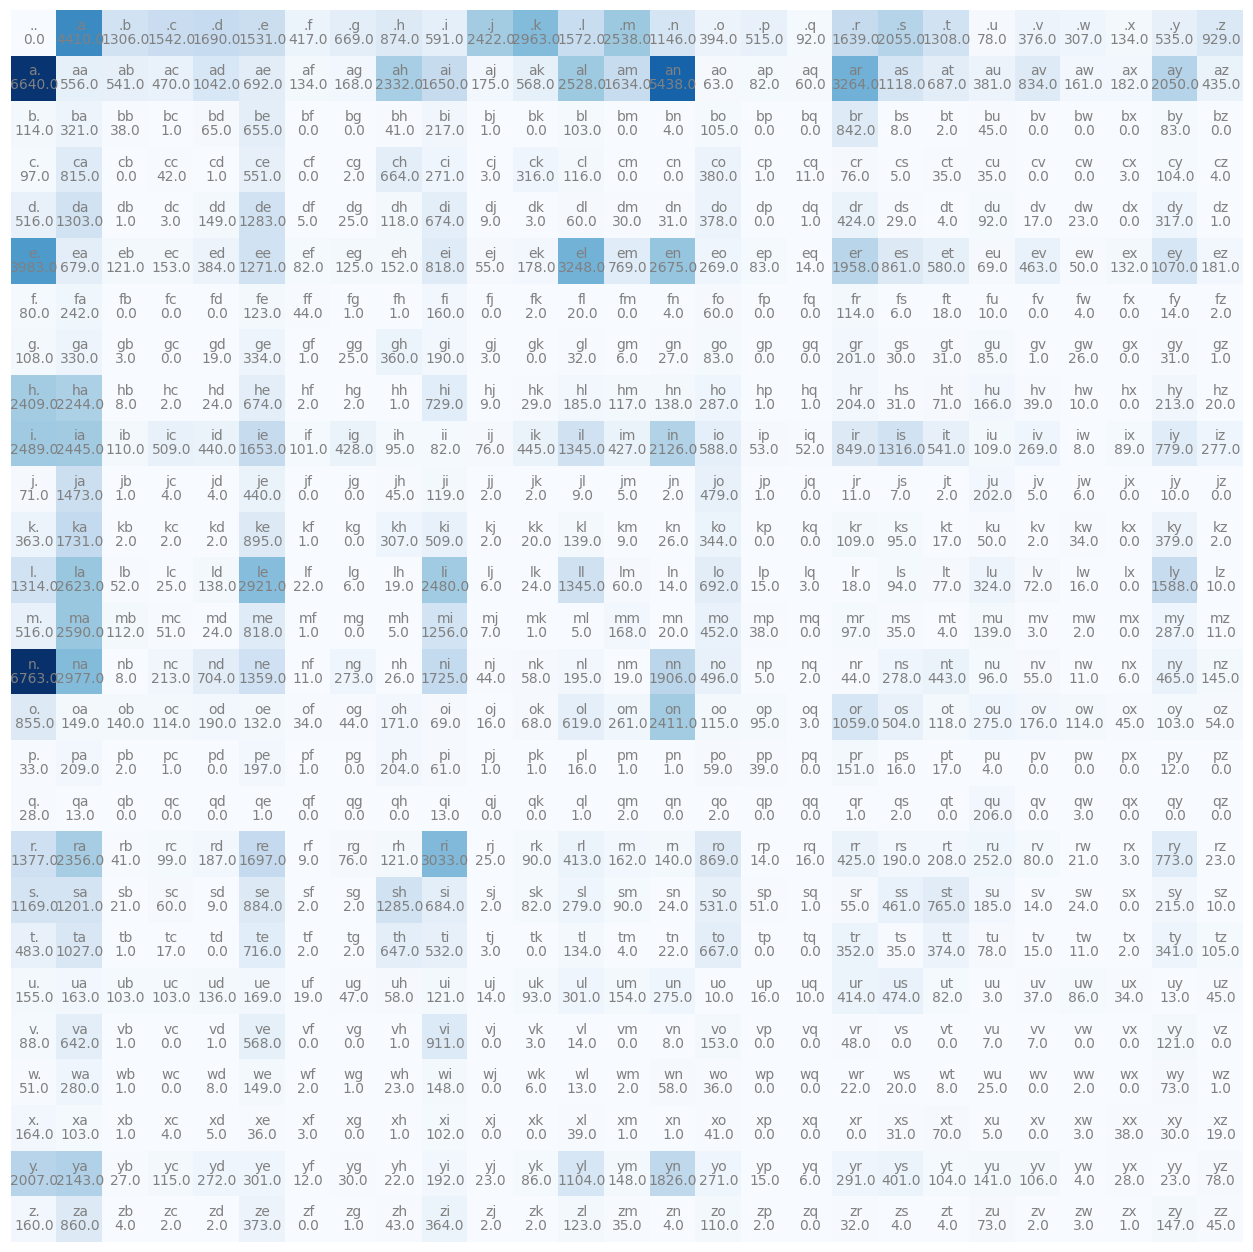

In [9]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [10]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

In [11]:
P = N/ N.sum(axis=1, keepdims=True)

In [12]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix==0:
            break

    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.
x.
al.
kal.


In [13]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [5]:
# create a training set for bigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [6]:
import torch.nn.functional as F

In [7]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)  
W.requires_grad=True

In [8]:
# training loop
for k in range(20):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # encode xs with F.one_hot
    logits = xenc @ W
    counts = torch.exp(logits)
    probs = counts/counts.sum(axis=1, keepdim=True)
    loss = -(torch.log(probs[range(len(ys)), ys]).mean())

    # backward pass
    W.grad = None  
    loss.backward()

    # update
    W.data -= 50 * W.grad 

    print(loss.item())

3.758953809738159
3.371100664138794
3.1540427207946777
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696887016296387
2.6529300212860107
2.638277769088745
2.6253879070281982
2.613990545272827
2.60386323928833
2.5948216915130615
2.5867116451263428
2.579403877258301


In [9]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @ W
        counts = torch.exp(logits)
        probs = counts/ counts.sum(axis=1, keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexza
mogllurail
azityha
konimittai
n
llayn
ka
da
staiypucja
bhrigotos


In [19]:
# Exercise 3: homework (*) extend the previous model to trigram

In [20]:
# create a training set for trigram model
xs = []
ys = []
for w in words:
    # add two start symbols and one end symbol
    chs = ['.', '.'] + list(w) + ['.']
    # loop over trigrams: context = (ch1,ch2), target = ch3
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append([ix1, ix2])
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [21]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27 * 2, 27), generator=g)
W.requires_grad = True

In [22]:
for k in range(20):
    xenc = F.one_hot(xs, num_classes=27).float()  # shape: (n, 2, 27)
    xenc = xenc.view(xenc.shape[0], -1)           # flatten to (n, 54)
    logits = xenc @ W                             # (n, 27)
    counts = torch.exp(logits)
    probs = counts / counts.sum(axis=1, keepdim=True)
    loss = -(torch.log(probs[torch.arange(len(ys)), ys]).mean())

    # backward pass
    W.grad = None  
    loss.backward()

    # update
    W.data -= 50 * W.grad 

    print(loss.item())


4.232541561126709
3.504002332687378
3.3188445568084717
2.957639217376709
2.8633434772491455
2.8381969928741455
2.750821113586426
2.7523365020751953
2.674598455429077
2.6792349815368652
2.626859188079834
2.646815299987793
2.5863285064697266
2.6032721996307373
2.561227798461914
2.589735746383667
2.5360989570617676
2.55894136428833
2.5216574668884277
2.554456949234009


In [23]:
# sample from the trigram model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    # start with a context of two start tokens (assumed to be index 0)
    context = [0, 0]
    for _ in range(10):
        # encode context (2 characters)
        x = F.one_hot(torch.tensor(context), num_classes=27).float()  # shape: (2, 27)
        x = x.view(1, -1)  # flatten to (1, 54)
        logits = x @ W   # (1, 27)
        counts = torch.exp(logits)
        probs = counts / counts.sum(axis=1, keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
        # update context: shift left and append the new index
        context = [context[1], ix]
    print(''.join(out))

cexze
aogllerail
azi
ah
mallimatta
an
lanak
kan
a
samiyaubjw


In [19]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [31]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# build the dataset (do not change this code)
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

In [37]:
emb_size = 300
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27, 10, generator=g) 
W1 = torch.randn((block_size*10, emb_size), generator=g)
b1 = torch.randn(emb_size, generator=g)
W2 = torch.randn((emb_size, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True


In [28]:
len(stoi)

27

In [23]:
# init weights (use torch.nn.init)
#b1 = ???
#b2 = ???
#W1 = ???
#W2 = ???

In [38]:
stepi = []
lossi = []

In [39]:
for p in parameters:
    p.requires_grad = True

In [40]:
# training loop (use the cross-entropy loss)
batch_size = 3000
for i in range(2000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,))

    # forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(batch_size, -1)@ W1 + b1) # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Y_train[ix])
  
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
         p.data -= 0.1* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
    print(i, loss)

0 tensor(32.6100, grad_fn=<NllLossBackward0>)
1 tensor(28.9719, grad_fn=<NllLossBackward0>)
2 tensor(27.6388, grad_fn=<NllLossBackward0>)
3 tensor(25.8716, grad_fn=<NllLossBackward0>)
4 tensor(24.7583, grad_fn=<NllLossBackward0>)
5 tensor(24.0454, grad_fn=<NllLossBackward0>)
6 tensor(23.6669, grad_fn=<NllLossBackward0>)
7 tensor(22.5985, grad_fn=<NllLossBackward0>)
8 tensor(22.2052, grad_fn=<NllLossBackward0>)
9 tensor(21.3594, grad_fn=<NllLossBackward0>)
10 tensor(20.5167, grad_fn=<NllLossBackward0>)
11 tensor(19.8747, grad_fn=<NllLossBackward0>)
12 tensor(18.9641, grad_fn=<NllLossBackward0>)
13 tensor(18.5891, grad_fn=<NllLossBackward0>)
14 tensor(18.0634, grad_fn=<NllLossBackward0>)
15 tensor(17.3746, grad_fn=<NllLossBackward0>)
16 tensor(17.1577, grad_fn=<NllLossBackward0>)
17 tensor(16.7101, grad_fn=<NllLossBackward0>)
18 tensor(16.3125, grad_fn=<NllLossBackward0>)
19 tensor(15.9381, grad_fn=<NllLossBackward0>)
20 tensor(15.8726, grad_fn=<NllLossBackward0>)
21 tensor(15.1507, grad

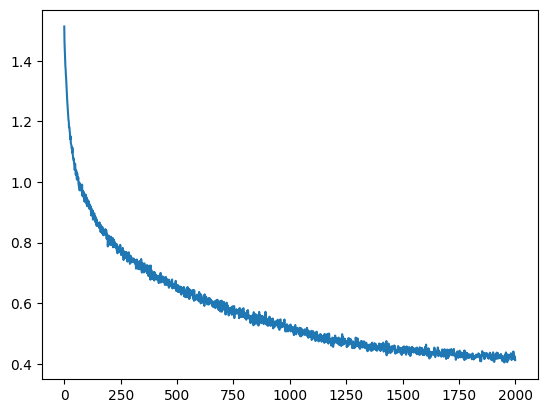

In [41]:
plt.plot(stepi, lossi)
plt.show()

In [ ]:
# compute the train and val loss

In [45]:
def compute_loss(X, Y, params=[C, W1, b1, W2, b2]): 
    C, W1, b1, W2, b2 = params
    emb = C[X]  # (N, block_size, emb_size)
    h = torch.tanh(emb.view(X.shape[0], -1) @ W1 + b1)
    logits = h @ W2 + b2
    return F.cross_entropy(logits, Y).item()
print(f"train loss: {compute_loss(X_train, Y_train):.4f}")
print(f"val loss: {compute_loss(X_dev, Y_dev):.4f}")

train loss: 2.6708
val loss: 2.6895


In [ ]:
# compute the train and val loss.  here are the initial results I got.  
#train loss: 2.6708
#val loss: 2.6895
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.
#Best configuration:
#Batch size: 256
#Learning rate: 0.1
#Embedding size: 5
#Iterations: 2000
#Hidden size: 100
#Training loss: 2.4628
#Validation loss: 2.4697

In [56]:
def train_model(X_train, Y_train, params, lr, epochs, batch_size, X_dev, Y_dev):
    g = torch.Generator().manual_seed(2147483647)
    C, W1, b1, W2, b2 = params
    parameters = [C, W1, b1, W2, b2]
    for p in parameters:
        p.requires_grad = True

    for i in range(epochs):
        ix = torch.randint(0, X_train.shape[0], (batch_size,))
        emb = C[X_train[ix]]
        h = torch.tanh(emb.view(batch_size, -1) @ W1 + b1)
        logits = h @ W2 + b2
        loss = F.cross_entropy(logits, Y_train[ix])

        # backward pass
        for p in parameters:
            p.grad = None
        loss.backward()
        # update
        for p in parameters:
            p.data -= lr * p.grad
        stepi.append(i)
        lossi.append(loss.item())

    return compute_loss(X_train, Y_train, params), compute_loss(X_dev, Y_dev, params)

In [57]:
from itertools import product
import pandas as pd

def create_parameters(emb_size, hidden_size, block_size, g):
    C = torch.randn(27, emb_size, generator=g)
    W1 = torch.randn((emb_size * block_size, hidden_size), generator=g)
    b1 = torch.randn(hidden_size, generator=g)
    W2 = torch.randn((hidden_size, 27), generator=g)
    b2 = torch.randn(27, generator=g)
    return [C, W1, b1, W2, b2]

def hyperparameter_search(X_train, Y_train, X_dev, Y_dev):
    # Hyperparameter grid
    batch_sizes = [128, 256]
    learning_rates = [0.01, 0.05, 0.1]
    emb_sizes = [5, 10, 50]
    epochs = [1000, 2000]
    hidden_sizes = [100, 300]
    block_size = 3
    
    # Store results
    results = []
    best_loss = float('inf')
    best_params = None
    best_config = None
    
    # Try all combinations
    for batch_size, lr, emb_size, n_iter, hidden_size in product(
        batch_sizes, learning_rates, emb_sizes, epochs, hidden_sizes
    ):
        print(f"\nTrying: batch_size={batch_size}, lr={lr}, emb_size={emb_size}, "
              f"n_iter={n_iter}, hidden_size={hidden_size}")
        
        # Initialize parameters
        g = torch.Generator().manual_seed(2147483647)
        params = create_parameters(emb_size, hidden_size, block_size, g)
        
        # Train model
        train_loss, val_loss = train_model(
            X_train, Y_train, params, lr, n_iter, batch_size, X_dev, Y_dev
        )
        
        # Store results
        config = {
            'batch_size': batch_size,
            'learning_rate': lr,
            'embedding_size': emb_size,
            'iterations': n_iter,
            'hidden_size': hidden_size,
            'train_loss': train_loss,
            'val_loss': val_loss
        }
        results.append(config)
        
        # Update best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_params = [p.clone() for p in params]
            best_config = config.copy()
            print(f"New best model found, validation loss: {val_loss:.4f}")
    
    # Convert results to DataFrame for easy analysis
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('val_loss')
    
    print("\nBest configuration:")
    print(f"Batch size: {best_config['batch_size']}")
    print(f"Learning rate: {best_config['learning_rate']}")
    print(f"Embedding size: {best_config['embedding_size']}")
    print(f"Iterations: {best_config['iterations']}")
    print(f"Hidden size: {best_config['hidden_size']}")
    print(f"Training loss: {best_config['train_loss']:.4f}")
    print(f"Validation loss: {best_config['val_loss']:.4f}")
    
    return best_params, best_config, results_df

# Run the hyperparameter search
best_params, best_config, results_df = hyperparameter_search(X_train, Y_train, X_dev, Y_dev)


Trying: batch_size=128, lr=0.01, emb_size=5, n_iter=1000, hidden_size=100
New best model found, validation loss: 5.1094

Trying: batch_size=128, lr=0.01, emb_size=5, n_iter=1000, hidden_size=300

Trying: batch_size=128, lr=0.01, emb_size=5, n_iter=2000, hidden_size=100
New best model found, validation loss: 3.8417

Trying: batch_size=128, lr=0.01, emb_size=5, n_iter=2000, hidden_size=300

Trying: batch_size=128, lr=0.01, emb_size=10, n_iter=1000, hidden_size=100

Trying: batch_size=128, lr=0.01, emb_size=10, n_iter=1000, hidden_size=300

Trying: batch_size=128, lr=0.01, emb_size=10, n_iter=2000, hidden_size=100

Trying: batch_size=128, lr=0.01, emb_size=10, n_iter=2000, hidden_size=300

Trying: batch_size=128, lr=0.01, emb_size=50, n_iter=1000, hidden_size=100

Trying: batch_size=128, lr=0.01, emb_size=50, n_iter=1000, hidden_size=300

Trying: batch_size=128, lr=0.01, emb_size=50, n_iter=2000, hidden_size=100

Trying: batch_size=128, lr=0.01, emb_size=50, n_iter=2000, hidden_size=300


In [58]:
print("\nBest configuration:")
print(f"Batch size: {best_config['batch_size']}")
print(f"Learning rate: {best_config['learning_rate']}")
print(f"Embedding size: {best_config['embedding_size']}")
print(f"Iterations: {best_config['iterations']}")
print(f"Hidden size: {best_config['hidden_size']}")
print(f"Training loss: {best_config['train_loss']:.4f}")
print(f"Validation loss: {best_config['val_loss']:.4f}")


Best configuration:
Batch size: 256
Learning rate: 0.1
Embedding size: 5
Iterations: 2000
Hidden size: 100
Training loss: 2.4628
Validation loss: 2.4697


In [ ]:
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.
#Best configuration:
#Batch size: 256
#Learning rate: 0.1
#Embedding size: 5
#Iterations: 2000
#Hidden size: 100
#Training loss: 2.4628
#Validation loss: 2.4697

In [59]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = [0] * block_size
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      counts = torch.exp(logits)
      probs = counts/counts.sum(axis=1, keepdim=True)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

aaru.
pyri.
zal.
nia.
nua.
ayse.
jaslen.
fir.
adis.
jostian.
kaiz.
adra.
sayci.
aith.
caliee.
dabalzxe.
sorian.
ke.
rir.
latria.
